# Physics-based Digital Twin: Active Particle Motility

The idea of this notebook is to create a very simple setup and do a very simple simulation of active particles with Neumann boundary condition without collision.

1. Import libraries required for the setup

In [13]:
import numpy as np
import matplotlib.pyplot as plt

print(f"Using numpy version: {np.__version__}")
print(f"Using matplotlib version: {plt.matplotlib.__version__}")

Using numpy version: 2.4.0
Using matplotlib version: 3.10.8


2.  Define simulation parameters

In [ ]:
# Diffusion coefficient
D = 0.1
# Time step
dt = 0.01
# No.of steps
n_steps = 5000
# No.of particles
N = 20
# Tube length
L = 5.0  # tube length

# For reproducible results
np.random.seed(42)

# Walls control (activate/deactivate)
walls = {
    "left": True,
    "right": True
}

# Wall positions (fixed fractions of L)
wall_positions = {
    "left": 0.0,
    "right": L
}

3. For N particle initialize particle position

In [20]:
# Create time array
time = np.arange(n_steps) * dt
# Initialize position array
position = np.zeros((N, n_steps))

4. Generate random noise

In [21]:
noise = np.random.normal(0, 1, (N, n_steps))

5. Time integration loop

    Using Langevin discretization (Discrete Euler-Maruyama form)

In [22]:
for i in range(1, n_steps):
    position[:, i] = position[:, i-1] + np.sqrt(2 * D * dt) * noise[:, i]

    # Reflection from the walls
    if walls["left"]:
        position[position[:, i] < 0, i] = -position[position[:, i] < 0, i]
    if walls["right"]:
        position[position[:, i] > L, i] = 2*L - position[position[:, i] > L, i]

6. Plot the trajectory

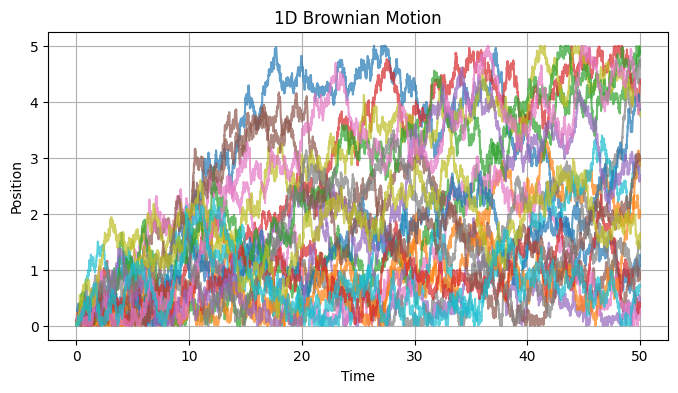

In [23]:
plt.figure(figsize=(8, 4))
for i in range(N):
    plt.plot(time, position[i, :], alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("1D Brownian Motion")
plt.grid(True)
plt.show()